In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
import sys
sys.path.append('..')
sys.path.append('../..')
sys.path.append('.')
sys.path.append('./scripts')
from simulations_util import *
from util import  apply_splitting_strategy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc
pd.set_option('display.max_columns', None)

In [2]:
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

### Regression

In [3]:
dgp = "linear"
combined_df = pd.DataFrame()
datasets = ["openml_361260", "openml_361259", "openml_361253", "openml_361254", "openml_361242", "openml_361243"]
for data in datasets:
    ablation_directory = f"/scratch/users/zhongyuan_liang/results_03_30/mdi_local.real_data_regression_{data}_{dgp}/{data}_{dgp}/varying_heritability_sample_row_n"
    feature_seeds = [1,2,3,4,5,6,7,8,9,10]#,11,12,13,14,15,16,17,18,19,20]
    sample_seeds = [1,2,3]
    for sample_seed in sample_seeds:
        for feature_seed in feature_seeds:
            try:
                df = pd.read_csv(os.path.join(ablation_directory, f"seed_{feature_seed}_{sample_seed}/results.csv"))
                df["data"] = data
                combined_df = pd.concat([combined_df, df], ignore_index=True)
            except:
                print(f"missing {data} {feature_seed} {sample_seed}")
df = combined_df.groupby(['sample_row_n', 'heritability', 'fi', 'data'])[["auroc_train", "auroc_test"]].mean().reset_index()

In [4]:
# methods = [
#     'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus',    
#     'MDI',
#     'LIME_RF',
#     'TreeSHAP_RF',
# ]
# color_map = {
#     'LIME_RF': '#71BEB7',
#     'TreeSHAP_RF': 'orange',
#     'MDI': '#9B5DFF',
#     'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'black'
# }
methods = [
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus',
    'Local_MDI+_MDI_default_fit_on_all_ranking_RFPlus',
    'Local_MDI+_MDI_elasticnet_RFPlus_moe',
    'Local_MDI+_MDI_default_RFPlus_moe',
    'Local_MDI+_MDI_default_RFPlus_loo_moe',
    # 'MDI',
    # 'MDI+',
    'LIME_RF',
    'TreeSHAP_RF',
]

color_map = {
    'LIME_RF': '#1F77B4',  # Blue
    'TreeSHAP_RF': '#FF7F0E',  # Orange
    # 'MDI': '#2CA02C',  # Green
    # 'MDI+': '#D62728',  # Red
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': '#000000',  # Black
    'Local_MDI+_MDI_default_RFPlus_loo_moe': '#9467BD',  # Purple
    'Local_MDI+_MDI_default_RFPlus_moe': '#8C564B',  # Brown
    'Local_MDI+_MDI_default_fit_on_all_ranking_RFPlus': '#E377C2',  # Pink
    'Local_MDI+_MDI_elasticnet_RFPlus_moe': '#7F7F7F',  # Gray
}

# data_name = {
#     "openml_361260": "Miami Housing",
#     "openml_361622": "Cars",
#     "openml_361254": "SARCOS",
#     "openml_361259": "Puma Robot",
#     "openml_361253": "Wave Energy",
#     "openml_361242": "Super Conductivitity"
# }

data_name = {
    "openml_361622": "361622",
    "openml_361260": "361260",
    "openml_361259": "361259",
    "openml_361253": "361253",
    "openml_361254": "361254",
    "openml_361242": "361242",
    "openml_361243": "361243"
}


# methods_name = {
#     'LIME_RF': 'LIME',
#     'MDI': 'bLoTLA',
#     'TreeSHAP_RF': 'TreeSHAP',
#     'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'LoTLA',
# }
methods_name = {
    'LIME_RF': 'LIME',
    # 'MDI': 'bLoTLA',
    # 'MDI+': 'MDI+',
    'TreeSHAP_RF': 'TreeSHAP',
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'LoTLA-CV',
    'Local_MDI+_MDI_default_fit_on_all_ranking_RFPlus': 'LoTLA-LOO',
    'Local_MDI+_MDI_elasticnet_RFPlus_moe': 'LoTLA-CV-MOE',
    'Local_MDI+_MDI_default_RFPlus_moe': 'LoTLA-LOO-MOE',
    'Local_MDI+_MDI_default_RFPlus_loo_moe': 'LoTLA-LOO-MOE-LOO',
}

In [5]:
performance_df = combined_df.groupby(['sample_row_n', 'heritability', 'data'])[["est_r2", "rf_plus_elastic_r2", "rf_plus_moe_elasticnet_r2", "rf_plus_default_r2", "rf_plus_moe_default_r2", "rf_plus_moe_loo_default_r2"]].mean().reset_index()

In [6]:
sample_size = 1000
heritability = 0.8
data = "openml_361259"
performance_df[(performance_df["sample_row_n"] == sample_size) & (performance_df["heritability"] == heritability) & (performance_df["data"] == data)]

sample_row_n  heritability           data    est_r2  rf_plus_elastic_r2  \
94          1000           0.8  openml_361259  0.643828            0.795294   

    rf_plus_moe_elasticnet_r2  rf_plus_default_r2  rf_plus_moe_default_r2  \
94                   0.785747            0.792582                 0.78545   

    rf_plus_moe_loo_default_r2  
94                     0.78582

/scratch/users/zhongyuan_liang/conda/envs/mdi/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/scratch/users/zhongyuan_liang/conda/envs/mdi/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/scratch/users/zhongyuan_liang/conda/envs/mdi/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


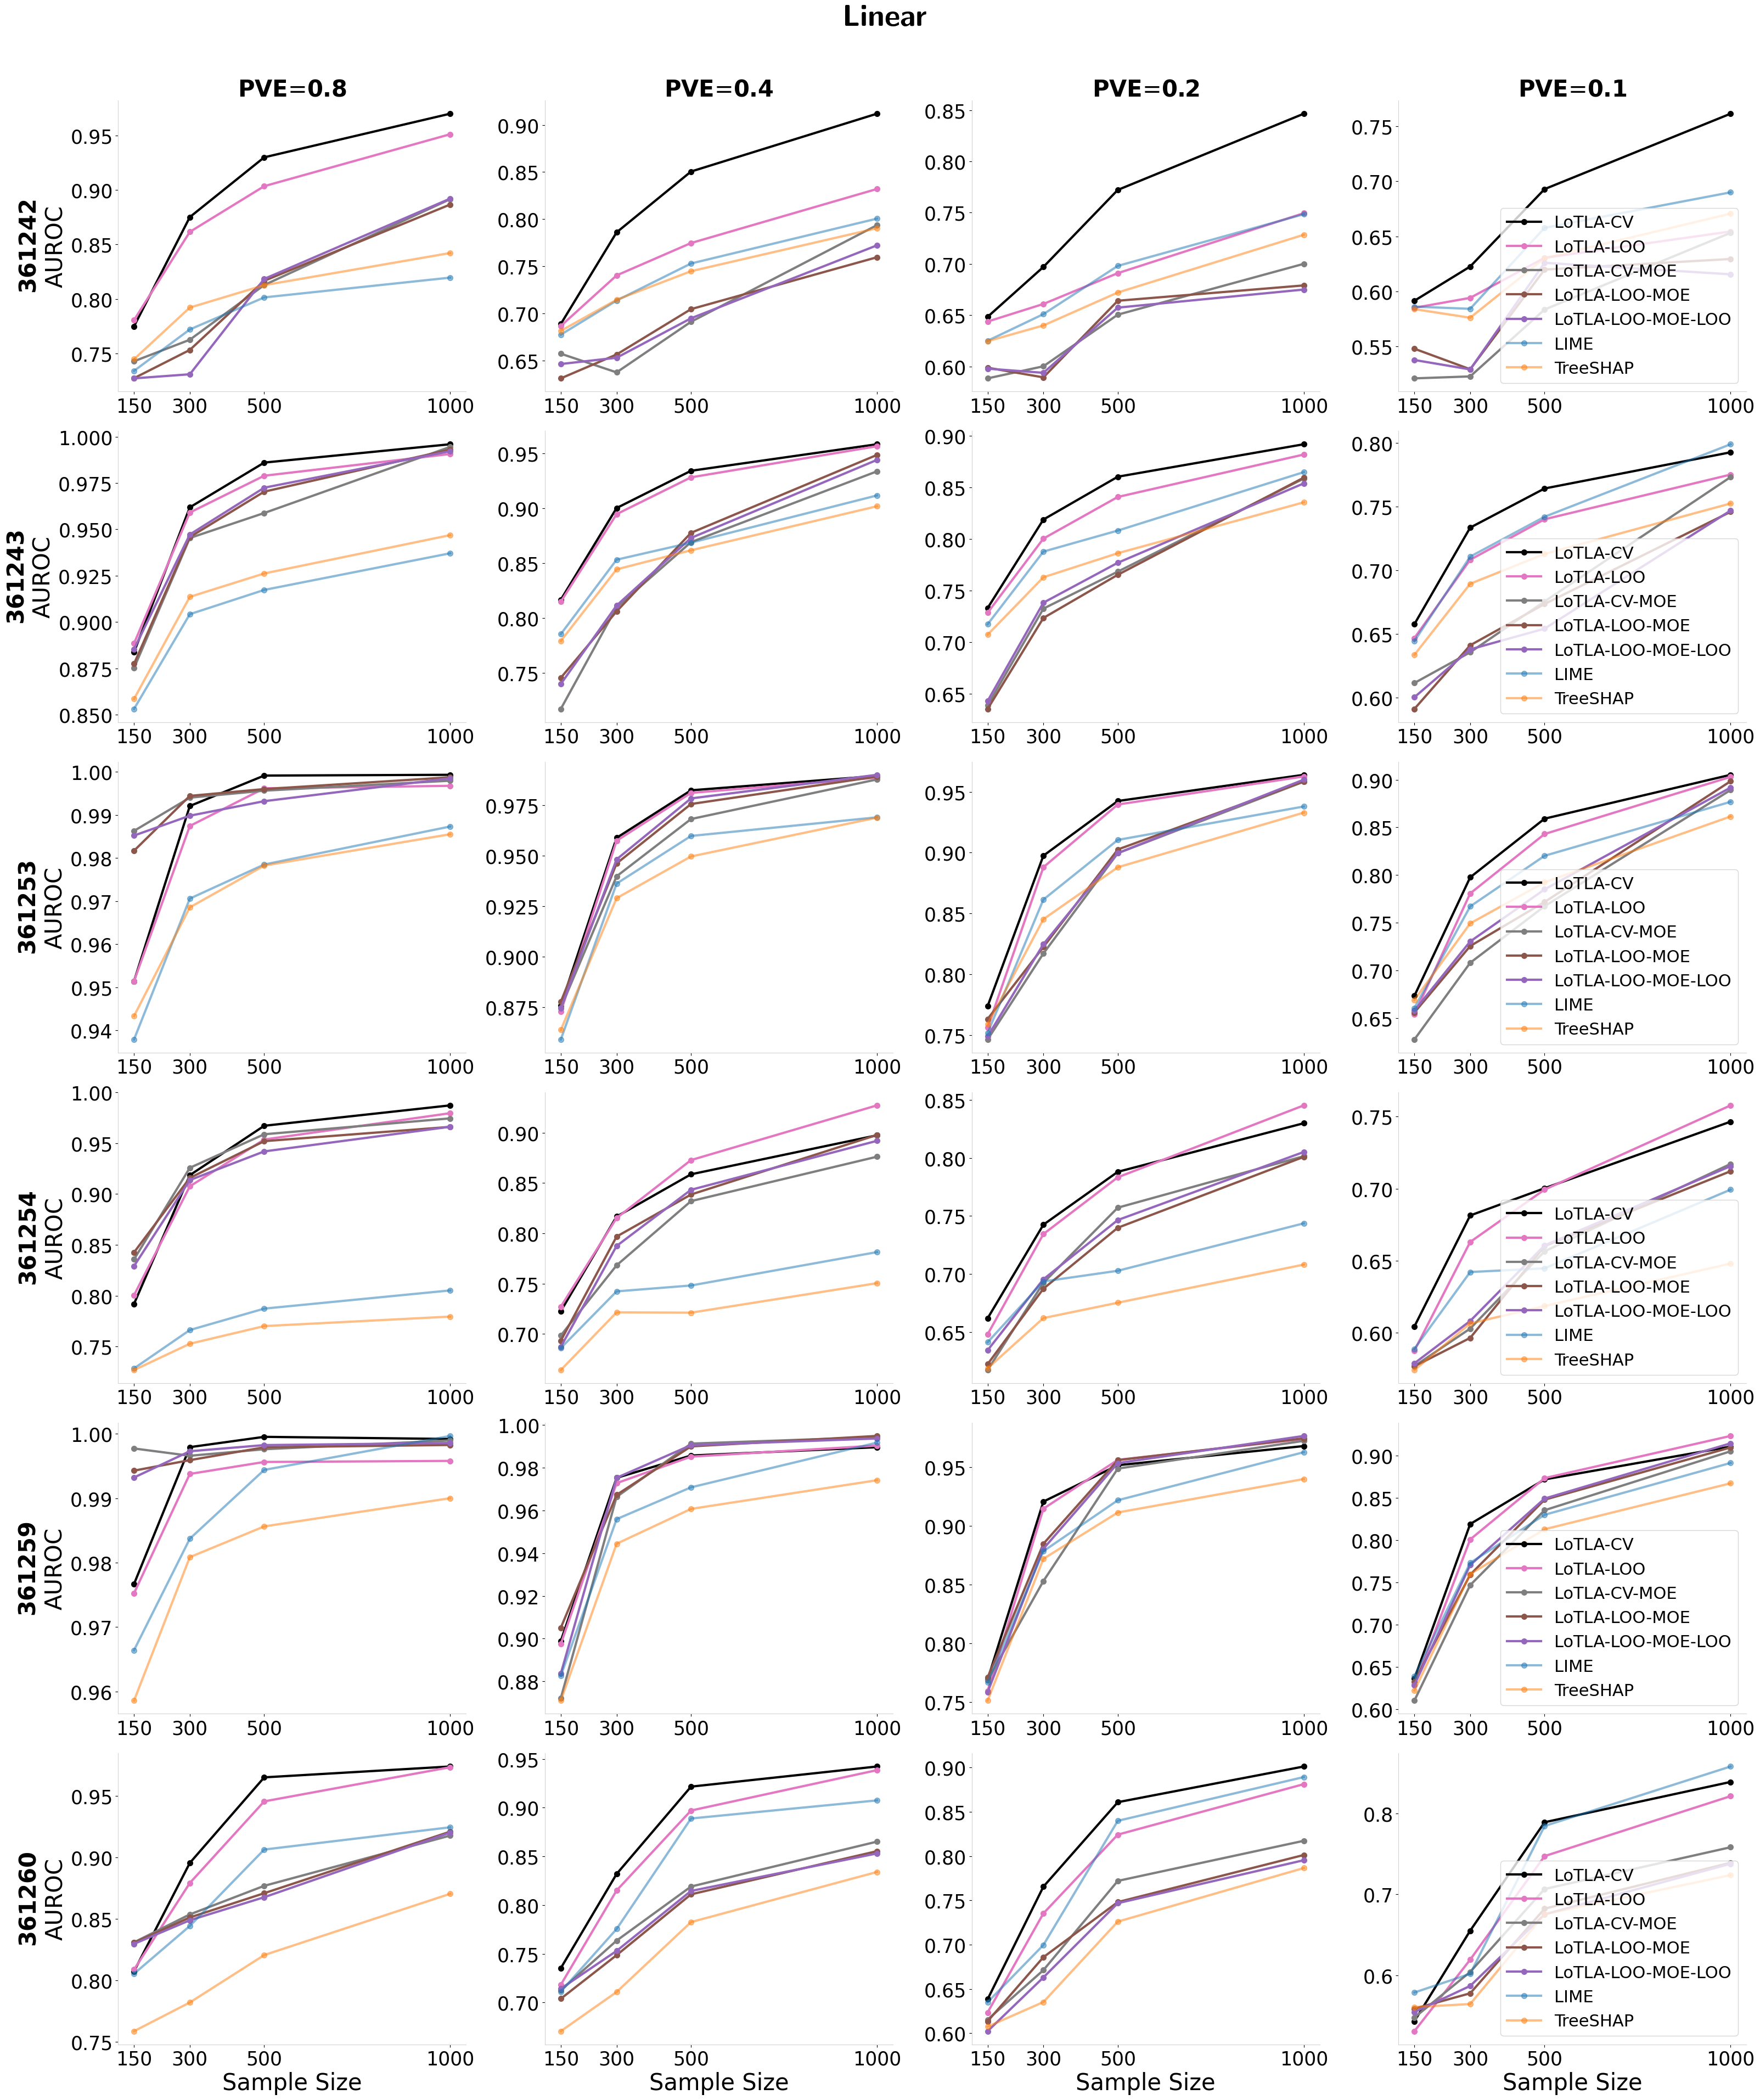

In [7]:
datasets = df["data"].unique()
heritability_all = df["heritability"].unique()[::-1]
marker_size = 7

# Number of columns is fixed (4 for PVE), number of rows is based on the number of datasets
n_cols = len(heritability_all)  # One column per PVE
n_rows = len(datasets)          # One row per dataset

# Create subplots
fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 6.5 * n_rows),
    sharey=False  # Share y-axis across columns for easier comparison
)

# Ensure axs is 2D for easy indexing
if n_rows == 1:
    axs = np.expand_dims(axs, axis=0)
if n_cols == 1:
    axs = np.expand_dims(axs, axis=1)

# Loop through each dataset (row) and PVE (column)
for row_idx, dataset in enumerate(datasets):
    for col_idx, heritability in enumerate(heritability_all):
        ax = axs[row_idx, col_idx]
        subset = df[(df["data"] == dataset) & (df["heritability"] == heritability)]
        
        # Plot results for each method
        for method in methods:
            method_data = subset[subset["fi"] == method]
            
            if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3, alpha=0.5
                )
            else:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3
                )
        
        # Set x-axis labels and ticks
        ax.set_xticks([150,300,500,1000])
        ax.set_xticklabels(["150", "300", "500", "1000"], fontsize=25)
        ax.tick_params(axis='y', labelsize=25)
        if row_idx == n_rows - 1:  # Label x-axis only for the last row
            ax.set_xlabel("Sample Size", fontsize=30)
        
        # Set y-axis labels only for the first column
        if col_idx == 0:
            dataset_label = data_name[dataset].replace(' ', r'\ ')
            ax.set_ylabel(f"$\\mathbf{{{dataset_label}}}$\nAUROC", fontsize=30)
        else:
            ax.set_ylabel("")
        
        # set this for the first row
        if row_idx == 0:
            ax.set_title(r"$\bf{PVE}$=" + rf"$\bf{{{heritability}}}$", fontsize=30)

        # Add legend to the last subplot of the row
        if col_idx == n_cols - 1:
            ax.legend(fontsize=22, loc='lower right')

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.suptitle(r"$\bf{Linear}$", fontsize=35)
plt.suptitle(r"\textbf{Linear}", fontsize=40, usetex=True)
#plt.savefig("feature_ranking_linear_vary_sample_size_all.png")
plt.show()

In [9]:
dgp = "interaction"
combined_df = pd.DataFrame()
datasets = ["openml_361260", "openml_361259", "openml_361253", "openml_361254", "openml_361242", "openml_361243"]
for data in datasets:
    ablation_directory = f"/scratch/users/zhongyuan_liang/results_03_30/mdi_local.real_data_regression_{data}_{dgp}/{data}_{dgp}/varying_heritability_sample_row_n"
    feature_seeds = [1,2,3,4,5,6,7,8,9,10]#,11,12,13,14,15,16,17,18,19,20]
    sample_seeds = [1,2,3]
    for sample_seed in sample_seeds:
        for feature_seed in feature_seeds:
            try:
                df = pd.read_csv(os.path.join(ablation_directory, f"seed_{feature_seed}_{sample_seed}/results.csv"))
                df["data"] = data
                combined_df = pd.concat([combined_df, df], ignore_index=True)
            except:
                pass
df = combined_df.groupby(['sample_row_n', 'heritability', 'fi', 'data'])[["auroc_train", "auroc_test"]].mean().reset_index()

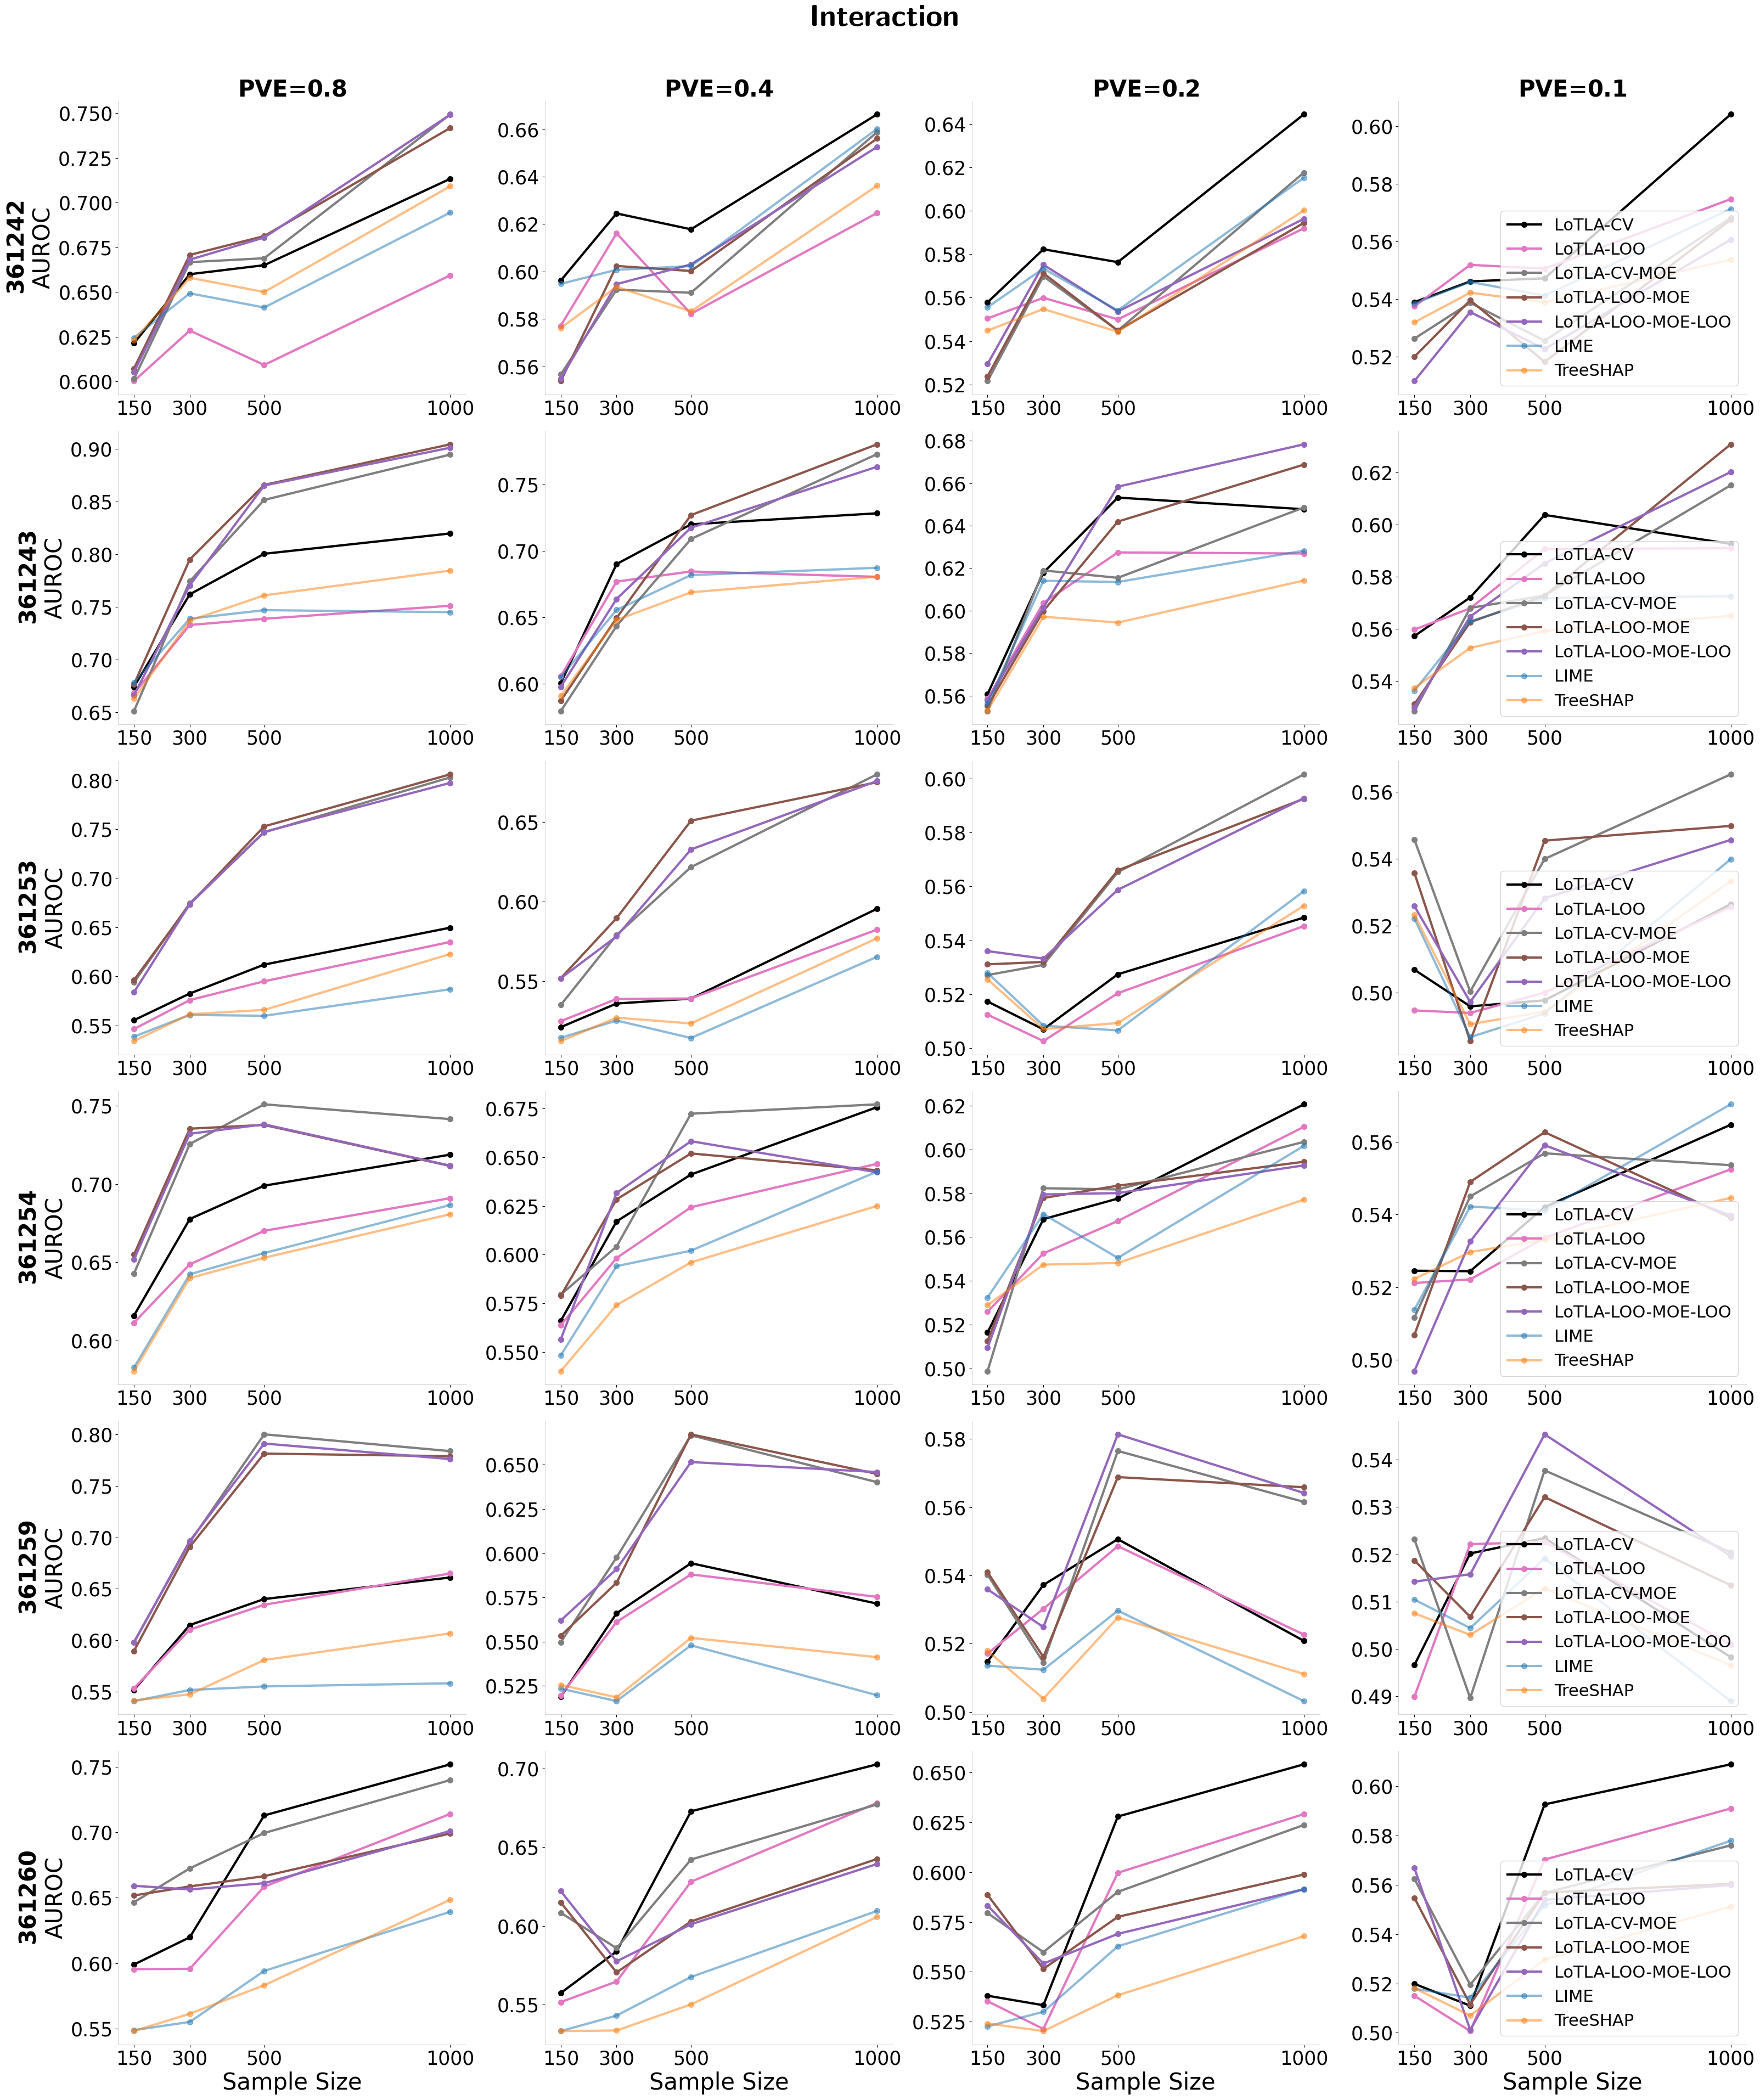

In [10]:
datasets = df["data"].unique()
heritability_all = df["heritability"].unique()[::-1]
marker_size = 7

# Number of columns is fixed (4 for PVE), number of rows is based on the number of datasets
n_cols = len(heritability_all)  # One column per PVE
n_rows = len(datasets)          # One row per dataset

# Create subplots
fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 6.5 * n_rows),
    sharey=False  # Share y-axis across columns for easier comparison
)

# Ensure axs is 2D for easy indexing
if n_rows == 1:
    axs = np.expand_dims(axs, axis=0)
if n_cols == 1:
    axs = np.expand_dims(axs, axis=1)

# Loop through each dataset (row) and PVE (column)
for row_idx, dataset in enumerate(datasets):
    for col_idx, heritability in enumerate(heritability_all):
        ax = axs[row_idx, col_idx]
        subset = df[(df["data"] == dataset) & (df["heritability"] == heritability)]
        
        # Plot results for each method
        for method in methods:
            method_data = subset[subset["fi"] == method]
            
            if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3, alpha=0.5
                )
            else:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3
                )
        
        # Set x-axis labels and ticks
        ax.set_xticks([150,300,500,1000])
        ax.set_xticklabels(["150", "300", "500", "1000"], fontsize=25)
        ax.tick_params(axis='y', labelsize=25)
        if row_idx == n_rows - 1:  # Label x-axis only for the last row
            ax.set_xlabel("Sample Size", fontsize=30)
        
        # Set y-axis labels only for the first column
        if col_idx == 0:
            dataset_label = data_name[dataset].replace(' ', r'\ ')
            ax.set_ylabel(f"$\\mathbf{{{dataset_label}}}$\nAUROC", fontsize=30)
        else:
            ax.set_ylabel("")
        
        # set this for the first row
        if row_idx == 0:
            ax.set_title(r"$\bf{PVE}$=" + rf"$\bf{{{heritability}}}$", fontsize=30)

        # Add legend to the last subplot of the row
        if col_idx == n_cols - 1:
            ax.legend(fontsize=22, loc='lower right')

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.suptitle(r"$\bf{Linear}$", fontsize=35)
plt.suptitle(r"\textbf{Interaction}", fontsize=40, usetex=True)
#plt.savefig("feature_ranking_interaction_vary_sample_size_all.png")
plt.show()

In [11]:
dgp = "linear_lss"
combined_df = pd.DataFrame()
datasets = ["openml_361260", "openml_361259", "openml_361253", "openml_361254", "openml_361242", "openml_361243"]
for data in datasets:
    ablation_directory = f"/scratch/users/zhongyuan_liang/results_03_30/mdi_local.real_data_regression_{data}_{dgp}/{data}_{dgp}/varying_heritability_sample_row_n"
    feature_seeds = [1,2,3,4,5,6,7,8,9,10]#,11,12,13,14,15,16,17,18,19,20]
    sample_seeds = [1,2,3]
    for sample_seed in sample_seeds:
        for feature_seed in feature_seeds:
            try:
                df = pd.read_csv(os.path.join(ablation_directory, f"seed_{feature_seed}_{sample_seed}/results.csv"))
                df["data"] = data
                combined_df = pd.concat([combined_df, df], ignore_index=True)
            except:
                pass
df = combined_df.groupby(['sample_row_n', 'heritability', 'fi', 'data'])[["auroc_train", "auroc_test"]].mean().reset_index()

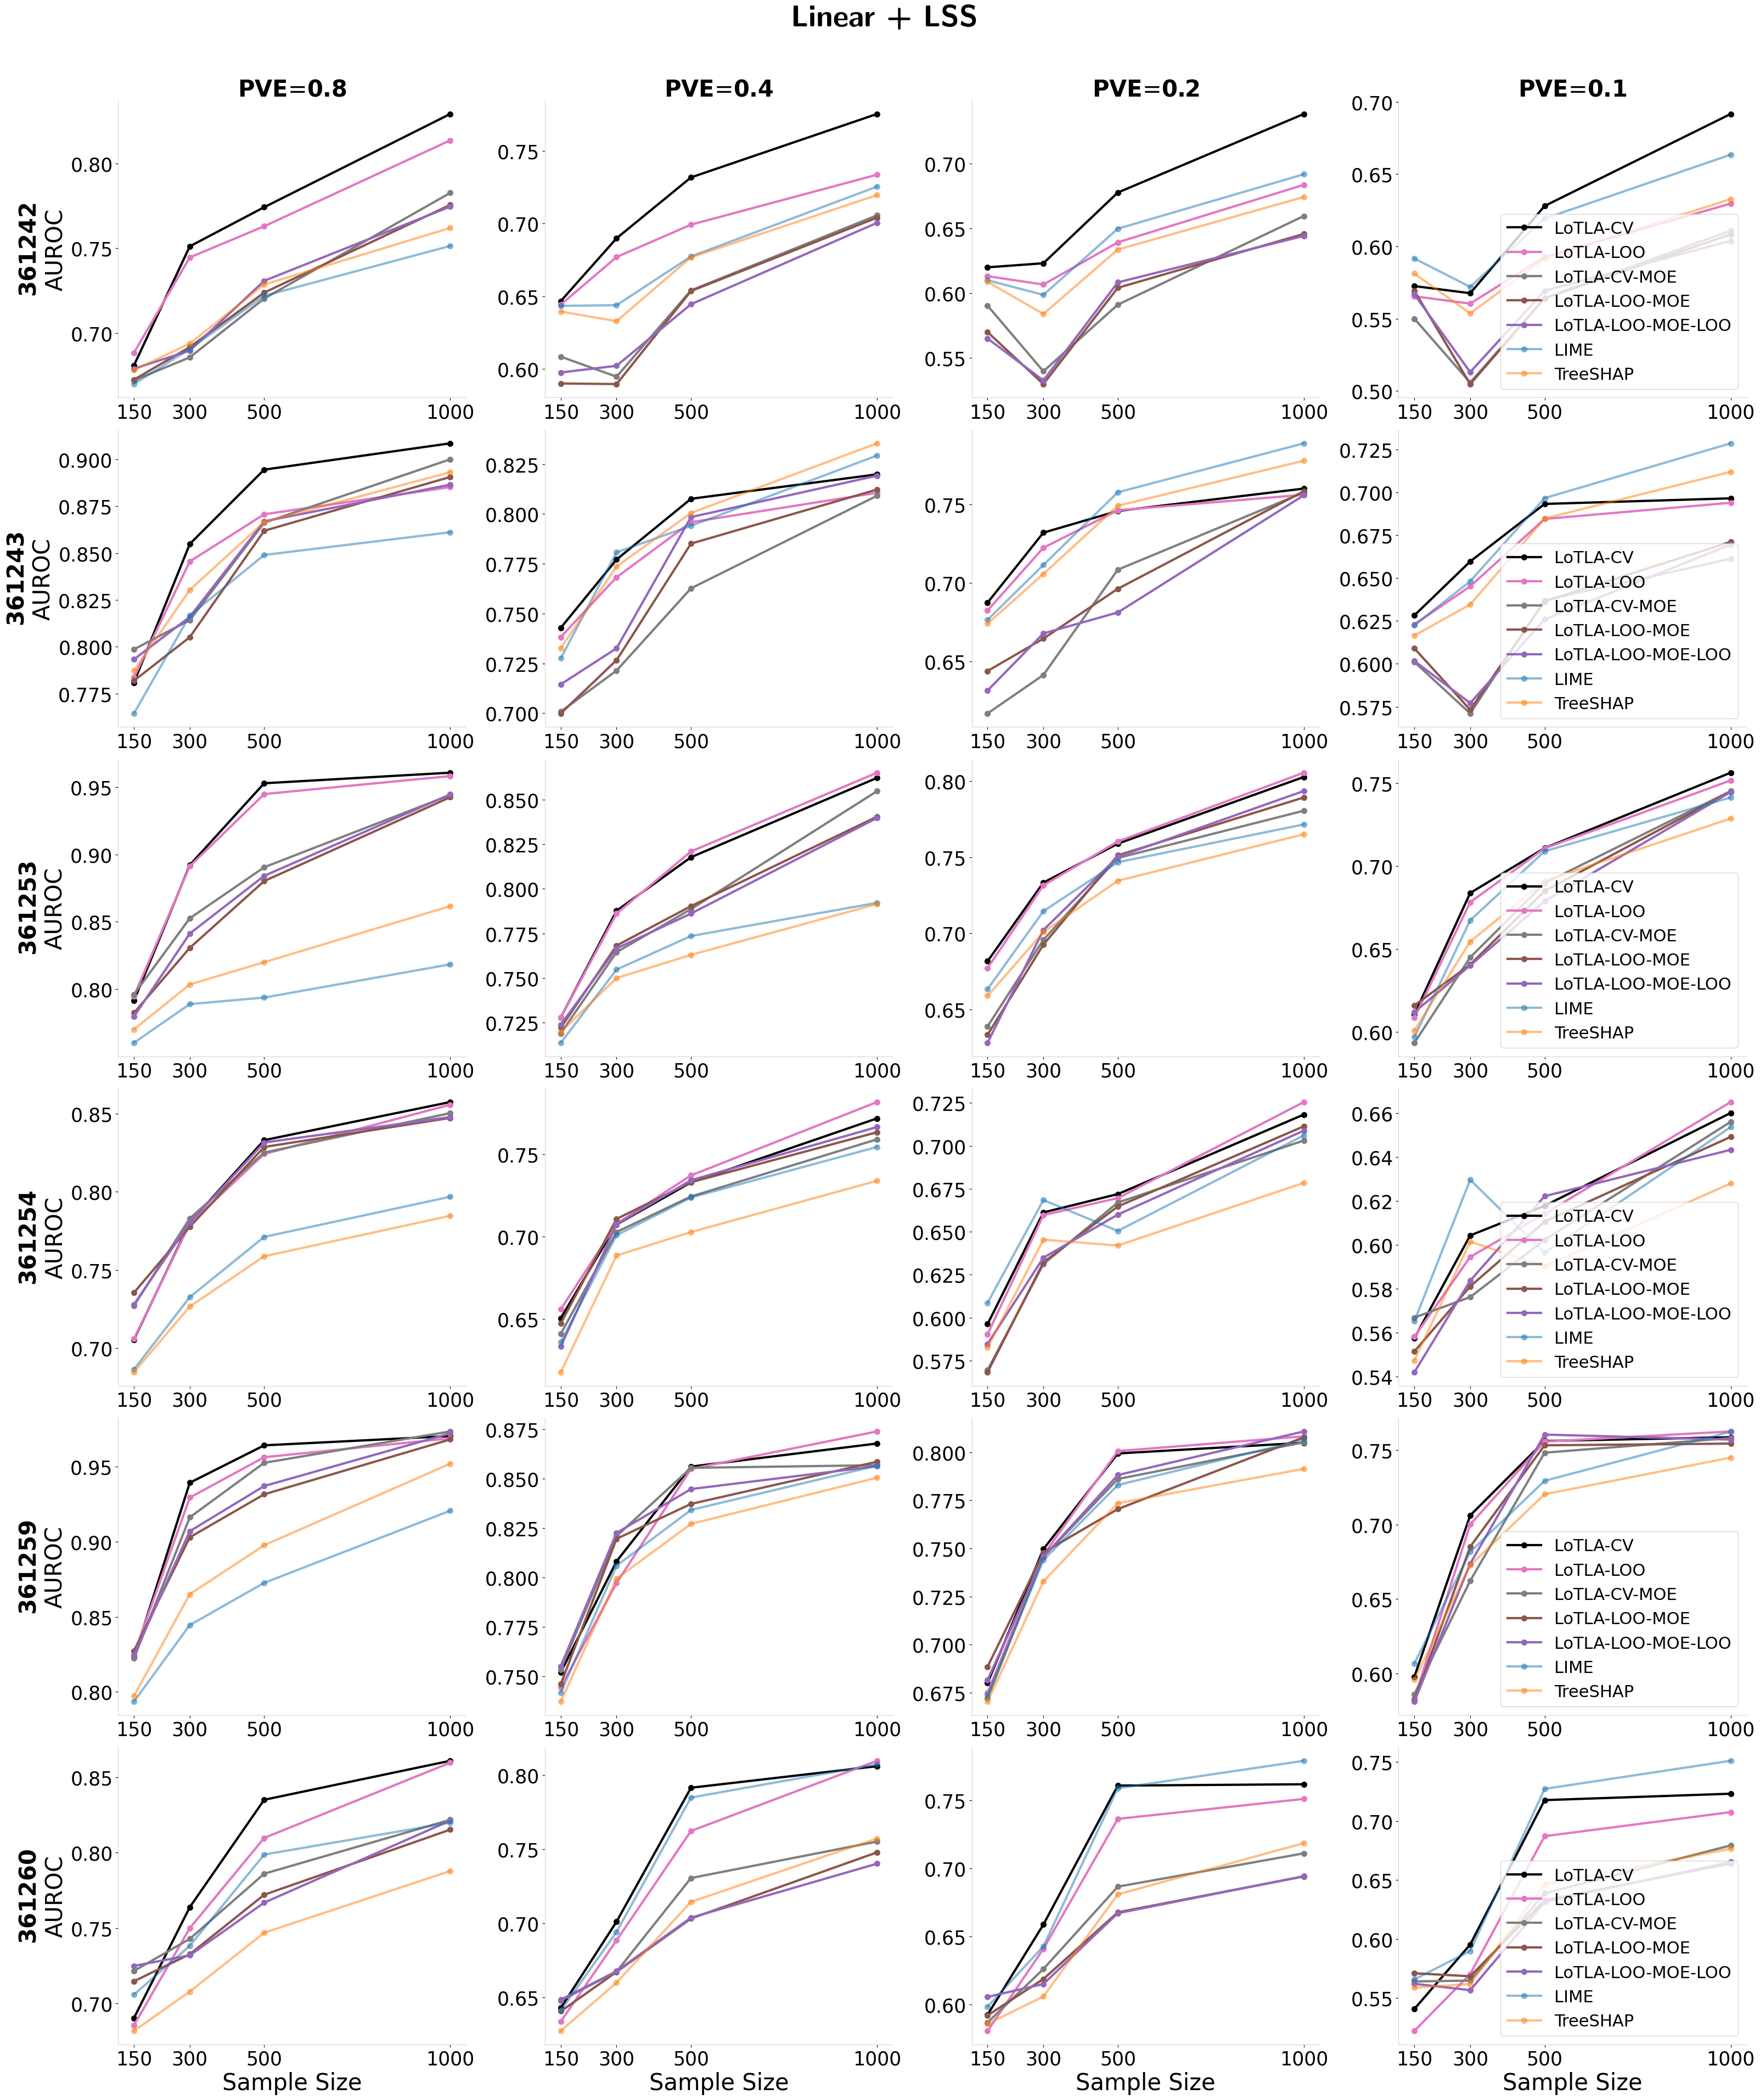

In [12]:
datasets = df["data"].unique()
heritability_all = df["heritability"].unique()[::-1]
marker_size = 7

# Number of columns is fixed (4 for PVE), number of rows is based on the number of datasets
n_cols = len(heritability_all)  # One column per PVE
n_rows = len(datasets)          # One row per dataset

# Create subplots
fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 6.5 * n_rows),
    sharey=False  # Share y-axis across columns for easier comparison
)

# Ensure axs is 2D for easy indexing
if n_rows == 1:
    axs = np.expand_dims(axs, axis=0)
if n_cols == 1:
    axs = np.expand_dims(axs, axis=1)

# Loop through each dataset (row) and PVE (column)
for row_idx, dataset in enumerate(datasets):
    for col_idx, heritability in enumerate(heritability_all):
        ax = axs[row_idx, col_idx]
        subset = df[(df["data"] == dataset) & (df["heritability"] == heritability)]
        
        # Plot results for each method
        for method in methods:
            method_data = subset[subset["fi"] == method]
            
            if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3, alpha=0.5
                )
            else:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3
                )
        
        # Set x-axis labels and ticks
        ax.set_xticks([150,300,500,1000])
        ax.set_xticklabels(["150", "300", "500", "1000"], fontsize=25)
        ax.tick_params(axis='y', labelsize=25)
        if row_idx == n_rows - 1:  # Label x-axis only for the last row
            ax.set_xlabel("Sample Size", fontsize=30)
        
        # Set y-axis labels only for the first column
        if col_idx == 0:
            dataset_label = data_name[dataset].replace(' ', r'\ ')
            ax.set_ylabel(f"$\\mathbf{{{dataset_label}}}$\nAUROC", fontsize=30)
        else:
            ax.set_ylabel("")
        
        # set this for the first row
        if row_idx == 0:
            ax.set_title(r"$\bf{PVE}$=" + rf"$\bf{{{heritability}}}$", fontsize=30)

        # Add legend to the last subplot of the row
        if col_idx == n_cols - 1:
            ax.legend(fontsize=22, loc='lower right')

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.suptitle(r"$\bf{Linear}$", fontsize=35)
plt.suptitle(r"\textbf{Linear + LSS}", fontsize=40, usetex=True)
#plt.savefig("feature_ranking_linear_lss_vary_sample_size_all.png")
plt.show()

### Classification

In [ ]:
dgp = "logistic_linear"
datasets = ["openml_43", "openml_361062", "openml_361071", "openml_9978", "openml_361069", "openml_361063"]
combined_df = pd.DataFrame()
for data in datasets:
    ablation_directory = f"/scratch/users/zhongyuan_liang/results/mdi_local.real_data_classification_{data}_{dgp}/{data}_{dgp}/varying_frac_label_corruption_sample_row_n"
    feature_seeds = [1,2,3,4,5,6,7,8,9,10]#,11,12,13,14,15,16,17,18,19,20]
    sample_seeds = [1,2,3]
    for sample_seed in sample_seeds:
        for feature_seed in feature_seeds:
            try:
                df = pd.read_csv(os.path.join(ablation_directory, f"seed_{feature_seed}_{sample_seed}/results.csv"))
                df["data"] = data
                combined_df = pd.concat([combined_df, df], ignore_index=True)
            except:
                print(f"missing {data} {sample_seed} {feature_seed}")
df = combined_df.groupby(['sample_row_n', 'frac_label_corruption', 'fi', 'data'])[["auroc_train", "auroc_test"]].mean().reset_index()

In [ ]:
methods = [
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus',    
    'MDI',
    'LIME_RF',
    'TreeSHAP_RF',
]
color_map = {
    'LIME_RF': '#71BEB7',
    'TreeSHAP_RF': 'orange',
    'MDI': '#9B5DFF',
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'black'
}

# data_name = {
#     "openml_43": "Spam",
#     "openml_9946": "Breast Cancer",
#     "openml_9978": "Ozone",
#     "openml_146819": "Climate",
#     "openml_361062": "Pol",
#     "openml_361070": "Eye Movement"
# }

data_name = {
    "openml_43": "43",
    "openml_361062": "361062",
    "openml_361071": "361071",
    "openml_9978": "9978",
    "openml_361069": "361069",
    "openml_361068": "361068",
    "openml_361063": "361063"
}

methods_name = {
    'LIME_RF': 'LIME',
    'MDI': 'bLoTLA',
    'TreeSHAP_RF': 'TreeSHAP',
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'LoTLA',
}

In [ ]:
datasets = df["data"].unique()
frac_label_corruption_all = df["frac_label_corruption"].unique()
marker_size = 7

# Number of columns is fixed (4 for PVE), number of rows is based on the number of datasets
n_cols = len(heritability_all)  # One column per PVE
n_rows = len(datasets)          # One row per dataset

# Create subplots
fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 6.5 * n_rows),
    sharey=False  # Share y-axis across columns for easier comparison
)

# Ensure axs is 2D for easy indexing
if n_rows == 1:
    axs = np.expand_dims(axs, axis=0)
if n_cols == 1:
    axs = np.expand_dims(axs, axis=1)

# Loop through each dataset (row) and PVE (column)
for row_idx, dataset in enumerate(datasets):
    for col_idx, frac_label_corruption in enumerate(frac_label_corruption_all):
        ax = axs[row_idx, col_idx]
        subset = df[(df["data"] == dataset) & (df["frac_label_corruption"] == frac_label_corruption)]
        
        # Plot results for each method
        for method in methods:
            method_data = subset[subset["fi"] == method]
            
            if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3, alpha=0.5
                )
            else:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3
                )
        
        # Set x-axis labels and ticks
        ax.set_xticks([150, 300, 500, 1000])
        ax.set_xticklabels(["150", "300", "500", "1000"], fontsize=25)
        ax.tick_params(axis='y', labelsize=25)
        if row_idx == n_rows - 1:  # Label x-axis only for the last row
            ax.set_xlabel("Sample Size", fontsize=30)
        
        # Set y-axis labels only for the first column
        if col_idx == 0:
            dataset_label = data_name[dataset].replace(' ', r'\ ')
            ax.set_ylabel(f"$\\mathbf{{{dataset_label}}}$\nAUROC", fontsize=30)
        else:
            ax.set_ylabel("")
        
        # set this for the first row
        if row_idx == 0:
            ax.set_title(rf"$\bf{{{int(frac_label_corruption*100)}}} \% \ $" + r"$\bf{Corrupted}$", fontsize=30)

        # Add legend to the last subplot of the row
        if col_idx == n_cols - 1:
            ax.legend(fontsize=22, loc='lower right')

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.suptitle(r"$\bf{Linear}$", fontsize=35)
plt.suptitle(r"\textbf{Logistic}", fontsize=40, usetex=True)
#plt.savefig("feature_ranking_logistic_linear_vary_sample_size_all.png")
plt.show()

In [ ]:
dgp = "logistic_interaction"
datasets = ["openml_43", "openml_361062", "openml_361071", "openml_9978", "openml_361069", "openml_361063"]
combined_df = pd.DataFrame()
for data in datasets:
    ablation_directory = f"/scratch/users/zhongyuan_liang/results/mdi_local.real_data_classification_{data}_{dgp}/{data}_{dgp}/varying_frac_label_corruption_sample_row_n"
    feature_seeds = [1,2,3,4,5,6,7,8,9,10]#,11,12,13,14,15,16,17,18,19,20]
    sample_seeds = [1,2,3]
    for sample_seed in sample_seeds:
        for feature_seed in feature_seeds:
            try:
                df = pd.read_csv(os.path.join(ablation_directory, f"seed_{feature_seed}_{sample_seed}/results.csv"))
                df["data"] = data
                combined_df = pd.concat([combined_df, df], ignore_index=True)
            except:
                print(f"missing {data} {sample_seed} {feature_seed}")
df = combined_df.groupby(['sample_row_n', 'frac_label_corruption', 'fi', 'data'])[["auroc_train", "auroc_test"]].mean().reset_index()

In [ ]:
datasets = df["data"].unique()
frac_label_corruption_all = df["frac_label_corruption"].unique()
marker_size = 7

# Number of columns is fixed (4 for PVE), number of rows is based on the number of datasets
n_cols = len(heritability_all)  # One column per PVE
n_rows = len(datasets)          # One row per dataset

# Create subplots
fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 6.5 * n_rows),
    sharey=False  # Share y-axis across columns for easier comparison
)

# Ensure axs is 2D for easy indexing
if n_rows == 1:
    axs = np.expand_dims(axs, axis=0)
if n_cols == 1:
    axs = np.expand_dims(axs, axis=1)

# Loop through each dataset (row) and PVE (column)
for row_idx, dataset in enumerate(datasets):
    for col_idx, frac_label_corruption in enumerate(frac_label_corruption_all):
        ax = axs[row_idx, col_idx]
        subset = df[(df["data"] == dataset) & (df["frac_label_corruption"] == frac_label_corruption)]
        
        # Plot results for each method
        for method in methods:
            method_data = subset[subset["fi"] == method]
            
            if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3, alpha=0.5
                )
            else:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3
                )
        
        # Set x-axis labels and ticks
        ax.set_xticks([150, 300, 500, 1000])
        ax.set_xticklabels(["150", "300", "500", "1000"], fontsize=25)
        ax.tick_params(axis='y', labelsize=25)
        if row_idx == n_rows - 1:  # Label x-axis only for the last row
            ax.set_xlabel("Sample Size", fontsize=30)
        
        # Set y-axis labels only for the first column
        if col_idx == 0:
            dataset_label = data_name[dataset].replace(' ', r'\ ')
            ax.set_ylabel(f"$\\mathbf{{{dataset_label}}}$\nAUROC", fontsize=30)
        else:
            ax.set_ylabel("")
        
        # set this for the first row
        if row_idx == 0:
            ax.set_title(rf"$\bf{{{int(frac_label_corruption*100)}}} \% \ $" + r"$\bf{Corrupted}$", fontsize=30)

        # Add legend to the last subplot of the row
        if col_idx == n_cols - 1:
            ax.legend(fontsize=22, loc='lower right')

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.suptitle(r"$\bf{Linear}$", fontsize=35)
plt.suptitle(r"\textbf{Logistic Interaction}", fontsize=40, usetex=True)
#plt.savefig("feature_ranking_logistic_interaction_vary_sample_size_all.png")
plt.show()

In [ ]:
dgp = "logistic_linear_lss"
datasets = ["openml_43", "openml_361062", "openml_361071", "openml_9978", "openml_361069", "openml_361063"]
combined_df = pd.DataFrame()
for data in datasets:
    ablation_directory = f"/scratch/users/zhongyuan_liang/results/mdi_local.real_data_classification_{data}_{dgp}/{data}_{dgp}/varying_frac_label_corruption_sample_row_n"
    feature_seeds = [1,2,3,4,5,6,7,8,9,10]#,11,12,13,14,15,16,17,18,19,20]
    sample_seeds = [1,2,3]
    for sample_seed in sample_seeds:
        for feature_seed in feature_seeds:
            try:
                df = pd.read_csv(os.path.join(ablation_directory, f"seed_{feature_seed}_{sample_seed}/results.csv"))
                df["data"] = data
                combined_df = pd.concat([combined_df, df], ignore_index=True)
            except:
                print(f"missing {data} {sample_seed} {feature_seed}")
df = combined_df.groupby(['sample_row_n', 'frac_label_corruption', 'fi', 'data'])[["auroc_train", "auroc_test"]].mean().reset_index()

In [ ]:
datasets = df["data"].unique()
frac_label_corruption_all = df["frac_label_corruption"].unique()
marker_size = 7

# Number of columns is fixed (4 for PVE), number of rows is based on the number of datasets
n_cols = len(heritability_all)  # One column per PVE
n_rows = len(datasets)          # One row per dataset

# Create subplots
fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 6.5 * n_rows),
    sharey=False  # Share y-axis across columns for easier comparison
)

# Ensure axs is 2D for easy indexing
if n_rows == 1:
    axs = np.expand_dims(axs, axis=0)
if n_cols == 1:
    axs = np.expand_dims(axs, axis=1)

# Loop through each dataset (row) and PVE (column)
for row_idx, dataset in enumerate(datasets):
    for col_idx, frac_label_corruption in enumerate(frac_label_corruption_all):
        ax = axs[row_idx, col_idx]
        subset = df[(df["data"] == dataset) & (df["frac_label_corruption"] == frac_label_corruption)]
        
        # Plot results for each method
        for method in methods:
            method_data = subset[subset["fi"] == method]
            
            if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3, alpha=0.5
                )
            else:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3
                )
        
        # Set x-axis labels and ticks
        ax.set_xticks([150, 300, 500, 1000])
        ax.set_xticklabels(["150", "300", "500", "1000"], fontsize=25)
        ax.tick_params(axis='y', labelsize=25)
        if row_idx == n_rows - 1:  # Label x-axis only for the last row
            ax.set_xlabel("Sample Size", fontsize=30)
        
        # Set y-axis labels only for the first column
        if col_idx == 0:
            dataset_label = data_name[dataset].replace(' ', r'\ ')
            ax.set_ylabel(f"$\\mathbf{{{dataset_label}}}$\nAUROC", fontsize=30)
        else:
            ax.set_ylabel("")
        
        # set this for the first row
        if row_idx == 0:
            ax.set_title(rf"$\bf{{{int(frac_label_corruption*100)}}} \% \ $" + r"$\bf{Corrupted}$", fontsize=30)

        # Add legend to the last subplot of the row
        if col_idx == n_cols - 1:
            ax.legend(fontsize=22, loc='lower right')

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.suptitle(r"$\bf{Linear}$", fontsize=35)
plt.suptitle(r"\textbf{Logistic + LSS}", fontsize=40, usetex=True)
#plt.savefig("feature_ranking_logistic_linear_lss_vary_sample_size_all.png")
plt.show()